# Project: Wrangling and Analyze Data

In [2]:
## importing necessary libraries
import pandas as pd
import numpy as np
import json
import requests

C:\Users\Emeka\miniconda3\envs\project1\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Data Gathering


1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#Load the twitter-archive-enhanced datase
WeRateDogs_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Download the content in url, save to a file and load to image_pred dataframe
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

image_pred = pd.read_csv("image-predictions.tsv", sep = "\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = WeRateDogs_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#Extracting the tweet ID, likes and retweets from the tweet-json text file
tweet_count = []
for line in open('tweet-json.txt', 'r'):
    data = json.loads(line)
    ID = data["id"]
    favorite_count = data["favorite_count"]
    retweet_count = data["retweet_count"]
    tweet_count.append({"ID": ID,
                       "Likes": favorite_count,
                       "Retweets":retweet_count
                      })
retweet_and_likes = pd.DataFrame(tweet_count)

## Assessing Data


### Twitter Archive Data

In [6]:
WeRateDogs_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
WeRateDogs_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Wild Tuscan Poofwiggle. Careful not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702539513...,12,10,a,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,None,None,None,None,None
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rose. Her face is stuck like that. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None,None,None,None
1224,714214115368108032,NaN,NaN,2016-03-27 22:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Easter from the squad! 🐇🐶 13/10 for all ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714214115...,13,10,None,None,None,None,None
960,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""This photographer took pics of her best frien...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/751205363...,12,10,None,None,None,None,None
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,None,None,None,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,7,10,Jett,None,None,None,None
861,763103485927849985,NaN,NaN,2016-08-09 20:03:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's a Butterflop Hufflepoof. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763103485...,10,10,Belle,None,None,None,None


In [8]:
WeRateDogs_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
WeRateDogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
len(WeRateDogs_archive[WeRateDogs_archive["rating_denominator"] > 10])

20

In [11]:
WeRateDogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
WeRateDogs_archive["name"].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Pancake       1
Timofy        1
Philippe      1
Shawwn        1
Jo            1
Name: name, Length: 957, dtype: int64

In [13]:
WeRateDogs_archive[WeRateDogs_archive.text.str.contains(r"(\d+\.\d\/\d+)")]

C:\Users\Emeka\miniconda3\envs\project1\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None


### Image Prediction Table

In [14]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_pred.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False


In [16]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [19]:
image_pred[image_pred["p2_dog"] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### Retweet and Likes Data

In [20]:
retweet_and_likes.head()

,ID,Likes,Retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [21]:
retweet_and_likes.sample(10)

,ID,Likes,Retweets
122,868880397819494401,55098,12518
2194,668852170888998912,479,184
2319,666435652385423360,170,54
297,837012587749474308,0,88
2232,668190681446379520,696,210
1508,691444869282295808,2890,955
765,777684233540206592,12518,3403
749,779123168116150273,13206,4207
2180,668992363537309700,802,381
1311,706904523814649856,15961,8830


In [22]:
retweet_and_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        2354 non-null   int64
 1   Likes     2354 non-null   int64
 2   Retweets  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
retweet_and_likes.describe()

,ID,Likes,Retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality issues

#### We Rate Dogs

1.Some of the ratings are not correctly extracted. 

2.+0000 at the end of timestamp column is unnecessary and makes time column hard to read 

3.Erroneous datatype(timestamp) column

4.Lots of missing values in reply to status information columns

5.Lots of missing values in retweet status information columns

6.Values in ratings denominator greater than 10 in Twitter archive table

7.Source column is duplicated across almost the entire dataset

8.Some dogs are assigned wrong names during extraction (e.g a, an, the, very, quite etc)

#### Image Prediction Table

9.Underscore in the dog names column in image prediction table

10.False results in predictions, meaning some of the pictures are not images of dogs

### Tidiness issues

11.Dog stage variable in we_rate_dogs data in four columns(Doggo, floofer, pupper and puppo)

12.The image prediction and retweets and likes table should be part of the twitter archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
WeRateDogs_archive_clean = WeRateDogs_archive.copy()
image_pred_clean = image_pred.copy()
retweet_and_likes_clean = retweet_and_likes.copy()

### Issue #1: [Twitter Archive Table] Some ratings are not correctly extracted

#### Define: 
Extract the ratings correctly from the text column, including ratings with decimals. Then convert to float

#### Code

In [25]:
def extract_ratings():
    
    # Extract the ratings from text
    WeRateDogs_archive_clean['rating_numerator'] = WeRateDogs_archive_clean['text'].str.extract(r"(\d+\.?\d?\/\d+)").astype(str)
    # Split the ratings and keep only the denominator
    WeRateDogs_archive_clean["rating_numerator"] = WeRateDogs_archive_clean["rating_numerator"].apply(lambda x : x.split("/")[0])
    # Remove the decimals from the fractional ratings
    WeRateDogs_archive_clean["rating_numerator"] = WeRateDogs_archive_clean["rating_numerator"].apply(lambda x : x.split(".")[0])
    # Convert to float
    WeRateDogs_archive_clean["rating_numerator"] = WeRateDogs_archive_clean["rating_numerator"].astype(float)
    
extract_ratings()

### Issue #2: [Twitter Archive Table] +0000 at the end of timestamp column is unnecessary and makes time column hard to read

#### Define: 
Remove +0000 at the end of values in timestamp column using str.slice

#### Code

In [26]:
#Remove the last 5 characters using slice function
WeRateDogs_archive_clean["timestamp"]= WeRateDogs_archive_clean["timestamp"].str.slice(0,-6,1)

#### Test

In [27]:
WeRateDogs_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


### Issue #3:[Twitter Archive Table] Erroneous datatype(timestamp) column

#### Define: 
Convert Timestamp column to a  datetime datatype using pd.to_datetime

#### Code

In [28]:
WeRateDogs_archive_clean["timestamp"]= pd.to_datetime(WeRateDogs_archive_clean["timestamp"])

#### Test

In [29]:
WeRateDogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   int64       

In [30]:
WeRateDogs_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


### Issue #4: [Twitter Archive Table] Lots of missing values in reply to status information columns

#### Define: 
Drop reply (in_reply_to_status_id, in_reply_to_user_id) columns in Twitter archive table with dropna

#### Code

In [31]:
#Drop the rows containing reply status information
WeRateDogs_archive_clean.drop(WeRateDogs_archive_clean[WeRateDogs_archive_clean['in_reply_to_status_id'] > 1].index,
                              inplace = True, axis = 0)
#Drop the redundant columns that contains only missing values
reply_columns = ["in_reply_to_status_id", "in_reply_to_user_id"]
WeRateDogs_archive_clean.drop(axis = 1, columns = reply_columns, inplace = True)

#### Test

In [32]:
WeRateDogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   int64         
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   object        
 3   text                        2278 non-null   object        
 4   retweeted_status_id         181 non-null    float64       
 5   retweeted_status_user_id    181 non-null    float64       
 6   retweeted_status_timestamp  181 non-null    object        
 7   expanded_urls               2274 non-null   object        
 8   rating_numerator            2278 non-null   float64       
 9   rating_denominator          2278 non-null   int64         
 10  name                        2278 non-null   object        
 11  doggo                       2278 non-null   object      

### Issue #5: [Twitter Archive Table] Lots of missing values in retweet status information columns

#### Define:  
Drop retweet columns(retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp columns in Twitter archive table using drop function

#### Code

In [33]:
#Drop the rows containing retweeted status information
WeRateDogs_archive_clean.drop(WeRateDogs_archive_clean[WeRateDogs_archive_clean['retweeted_status_id'] > 1].index,
                              inplace = True, axis = 0)
#Drop the redundant columns that contains only missing values
retweet_columns = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
WeRateDogs_archive_clean.drop(axis = 1, columns = retweet_columns, inplace = True)

#### Test

In [34]:
WeRateDogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   float64       
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 213.0+ KB


### Issue #6: [Twitter Archive Table]  Values in ratings denominator greater than 10 in Twitter archive table

#### Define: 
Drop all rows whose ratings denominator values is not equal to 10 in Twitter archive table since they are just 20 rows

#### Code

In [35]:
# Drop all rows whose ratings denominator is not equal to 10
WeRateDogs_archive_clean = WeRateDogs_archive_clean[WeRateDogs_archive_clean["rating_denominator"] == 10]

#### Test

In [36]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean["rating_denominator"] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: [Twitter Archive Table] Source column is duplicated across almost the entire dataset

#### Define: 
Drop Source column 

#### Code

In [37]:
WeRateDogs_archive_clean.drop(axis = 1, columns = ['source'], inplace = True)

#### Test

In [38]:
WeRateDogs_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


### Issue #8: [Image Prediction]  Rename dogs that are wrongly named (e.g a, an, the, very, quite etc)

#### Define

#### Code

In [39]:
# Extract a list of all wrongle extracted names (i.e names in small letters)
wrong_names = WeRateDogs_archive_clean[WeRateDogs_archive_clean['name'].str.islower()]['name'].value_counts().index.tolist()
for name in wrong_names:
    WeRateDogs_archive_clean['name'].replace(to_replace = name, value = None, inplace = True)

#### Test

In [40]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['name'].str.islower()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #9: [Image Prediction]  Remove the underscore in the dog names column in image prediction table

#### Define:  
Remove underscore in dog names columns(p1,p2,p3) using str.replace

#### Code

In [41]:
image_pred_clean["p1"] = image_pred_clean["p1"].str.replace("_", " ")
image_pred_clean["p2"] = image_pred_clean["p2"].str.replace("_", " ")
image_pred_clean["p3"] = image_pred_clean["p3"].str.replace("_", " ")

#### Test

In [42]:
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat belt,0.425176,False,Labrador retriever,0.128128,True,Siamese cat,0.091241,False
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich terrier,0.419838,True,cairn,0.351876,True,Norfolk terrier,0.051094,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian greyhound,0.103338,True,basenji,0.091930,True
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False


### Issue #10: [Image Prediction] False results in predictions, meaning some of the pictures are not images of dogs 

#### Define: 
Drop false results of images of dogs

#### Code

In [43]:
image_pred_clean = image_pred_clean[image_pred_clean["p1_dog"] == True]

#### Test

In [44]:
image_pred_clean[image_pred_clean["p1_dog"] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #11: [Twitter Archive Table] Dog stage variable in we_rate_dogs data in four columns(Doggo, floofer, pupper and puppo)

#### Define: 
Create a function that stacks all the dog stages column and merge back to the dataset

#### Code

In [45]:

def melt_dog_stages():
    """
    Function that stacks the dog stages columns into one
    """
    
    ## Extract the dog stages column, then reshape into one column using and convert it to dataframe
    dog_stage = WeRateDogs_archive_clean[["doggo", "floofer", "pupper", "puppo"]].replace('None', np.nan)
    dog_stage = dog_stage.stack().reset_index(level = 1, drop = True)
    dog_stage = pd.DataFrame(dog_stage, columns = ["Dog_Stage"])
    
    #Create a slice of the other columns for merging 
    df_cut = WeRateDogs_archive_clean[["tweet_id","timestamp","text", "expanded_urls", 
                        "rating_numerator","rating_denominator","name"]]
    WeRateDogs_wrangled_data = pd.merge(df_cut, dog_stage, left_index = True, right_index = True, how = 'left')
    
    return WeRateDogs_wrangled_data

WeRateDogs_archive_clean =  melt_dog_stages()

#### Test

In [46]:
WeRateDogs_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN


In [47]:
WeRateDogs_archive_clean["Dog_Stage"].isnull().sum()

1744

In [48]:
WeRateDogs_archive_clean["Dog_Stage"].value_counts()

pupper     230
doggo       83
puppo       24
floofer     10
Name: Dog_Stage, dtype: int64

In [49]:
WeRateDogs_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN


### Issue #12:   The image prediction and retweets and likes table should be part of the twitter archive table

#### Define: 
Merge all the datasets together, we merge the twitter archive data and the image prediction dataset. Then merge the resulting dataset with the retweets and likes dataset.

#### Code

In [50]:
#Merge the twitter archive table and image predictions table
image_pred_clean.rename(columns = {"tweet_id":"tweet_id1"}, inplace = True)

twitter_and_image = pd.merge(WeRateDogs_archive_clean,image_pred_clean,left_on='tweet_id',
                             right_on='tweet_id1', how='right')
twitter_and_image.drop('tweet_id1', axis = 1, inplace = True)

In [51]:
# Merge the combined table above with the retweets and likes table
full_table = pd.merge(twitter_and_image,retweet_and_likes_clean,
                                  left_on='tweet_id',right_on='ID', how='left').drop('ID', axis = 1)

In [52]:
full_table.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Likes,Retweets
0,6.660209e+17,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,...,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True,NaN,NaN
1,6.660293e+17,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,132.0,48.0
2,6.660334e+17,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN
3,6.660442e+17,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,311.0,147.0
4,6.660492e+17,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN


#### Test

In [53]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1540
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1458 non-null   float64       
 1   timestamp           1458 non-null   datetime64[ns]
 2   text                1458 non-null   object        
 3   expanded_urls       1458 non-null   object        
 4   rating_numerator    1458 non-null   float64       
 5   rating_denominator  1458 non-null   float64       
 6   name                1458 non-null   object        
 7   Dog_Stage           236 non-null    object        
 8   jpg_url             1541 non-null   object        
 9   img_num             1541 non-null   int64         
 10  p1                  1541 non-null   object        
 11  p1_conf             1541 non-null   float64       
 12  p1_dog              1541 non-null   bool          
 13  p2                  1541 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
full_table.to_csv("twitter_archive_master.csv", index = False)

In [55]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,Likes,Retweets
count,1.458000e+03,1458.000000,1458.0,1541.000000,1541.000000,1541.000000,1.541000e+03,950.000000,950.000000
mean,7.413551e+17,10.983539,10.0,1.212200,0.614328,0.141160,6.174214e-02,9110.252632,2683.690526
std,6.876208e+16,2.450835,0.0,0.572991,0.259740,0.102394,5.254498e-02,11640.260177,3997.450379
min,6.660209e+17,2.000000,10.0,1.000000,0.044333,0.000023,2.160900e-07,81.000000,16.000000
25%,6.783361e+17,10.000000,10.0,1.000000,0.391471,0.056993,1.534340e-02,2101.000000,619.500000
50%,7.169062e+17,11.000000,10.0,1.000000,0.615163,0.127717,4.981050e-02,4517.000000,1430.500000
75%,7.961414e+17,12.000000,10.0,1.000000,0.852088,0.203671,9.543400e-02,11619.500000,3280.250000
max,8.921774e+17,75.000000,10.0,4.000000,0.999956,0.467678,2.734190e-01,107015.000000,56625.000000


In [57]:
twitter_archive_master["rating_numerator"].value_counts()

12.0    383
10.0    318
11.0    306
13.0    211
9.0     106
8.0      58
7.0      24
14.0     19
6.0      12
5.0      10
4.0       4
3.0       3
75.0      1
27.0      1
26.0      1
2.0       1
Name: rating_numerator, dtype: int64

<AxesSubplot:>

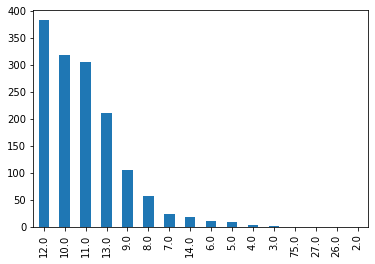

In [58]:
twitter_archive_master["rating_numerator"].value_counts().plot(kind = 'bar')

In [59]:
twitter_archive_master["Dog_Stage"].value_counts()

pupper     151
doggo       57
puppo       20
floofer      8
Name: Dog_Stage, dtype: int64

<AxesSubplot:title={'center':'Average Likes of dog stages'}, xlabel='Dog Stages', ylabel='counts'>

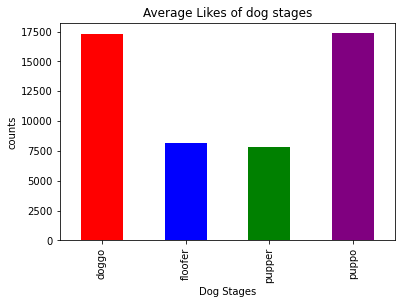

In [60]:
twitter_archive_master.groupby("Dog_Stage")["Likes"].mean().plot(kind = 'bar', 
                                                                 color =['red', 'blue', 'green', 'purple'],
                                                                title = "Average Likes of dog stages",
                                                                xlabel = "Dog Stages",
                                                                ylabel = "counts")

In [61]:
twitter_archive_master.groupby("Dog_Stage")["Retweets"].mean()

Dog_Stage
doggo      5957.727273
floofer    2525.400000
pupper     2473.533333
puppo      5346.692308
Name: Retweets, dtype: float64

In [62]:
#Check counts of First prediction of images
twitter_archive_master["p1"].value_counts()

golden retriever      154
Labrador retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
clumber                 1
groenendael             1
standard schnauzer      1
silky terrier           1
EntleBucher             1
Name: p1, Length: 111, dtype: int64

In [63]:
twitter_archive_master.sort_values('Retweets', ascending = False)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Likes,Retweets
1190,8.071068e+17,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,...,0.505370,True,Pomeranian,0.120358,True,toy terrier,0.077008,True,107015.0,56625.0
1255,8.190048e+17,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10.0,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,...,0.351308,True,toy poodle,0.271929,True,Tibetan terrier,0.094759,True,95450.0,42228.0
1133,7.954643e+17,2016-11-07 03:14:10,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,...,0.193082,True,Chesapeake Bay retriever,0.157927,True,soft-coated wheaten terrier,0.124684,True,55683.0,27728.0
1455,8.703740e+17,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,...,0.841001,True,Great Pyrenees,0.099278,True,Labrador retriever,0.032621,True,85011.0,27680.0
837,7.395441e+17,2016-06-05 19:47:03,This... is a Tyrannosaurus rex. We only rate d...,https://twitter.com/dog_rates/status/739544079...,10.0,10.0,None,NaN,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,...,0.967397,True,golden retriever,0.016641,True,ice bear,0.014858,False,43694.0,24319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,8.896654e+17,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,NaN,NaN
1531,8.898809e+17,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,Bruno,NaN,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,...,0.377417,True,Labrador retriever,0.151317,True,muzzle,0.082981,False,NaN,NaN
1533,8.902403e+17,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,NaN,NaN
1536,8.909719e+17,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False,NaN,NaN


In [64]:
twitter_archive_master.sort_values('Likes', ascending = False)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Likes,Retweets
1190,8.071068e+17,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,...,0.505370,True,Pomeranian,0.120358,True,toy terrier,0.077008,True,107015.0,56625.0
1255,8.190048e+17,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10.0,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,...,0.351308,True,toy poodle,0.271929,True,Tibetan terrier,0.094759,True,95450.0,42228.0
1455,8.703740e+17,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,...,0.841001,True,Great Pyrenees,0.099278,True,Labrador retriever,0.032621,True,85011.0,27680.0
1315,8.305833e+17,2017-02-12 01:04:29,This is Lilly. She just parallel barked. Kindl...,https://twitter.com/dog_rates/status/830583320...,13.0,10.0,Lilly,NaN,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,...,0.908703,True,seat belt,0.057091,False,pug,0.011933,True,73397.0,19297.0
1482,8.777365e+17,2017-06-22 03:54:17,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13.0,10.0,Aja,NaN,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,...,0.837956,True,Labrador retriever,0.062034,True,Weimaraner,0.040599,True,71144.0,17300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,8.896654e+17,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,NaN,NaN
1531,8.898809e+17,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,Bruno,NaN,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,...,0.377417,True,Labrador retriever,0.151317,True,muzzle,0.082981,False,NaN,NaN
1533,8.902403e+17,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,NaN,NaN
1536,8.909719e+17,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False,NaN,NaN


### Insights:
1.The value 12 is the most popular rating and the average ratings across the entire dataset is approximately 11.

2.golden retriever and Labrador retriever constitite the highest amount of dogs posted on We Rate Dogs twitter account.

3.Among the differenet dog stages, puppo has the highest number of average likes 

### Visualization

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:title={'center':'Count of numerator ratings'}, xlabel='ratings'>

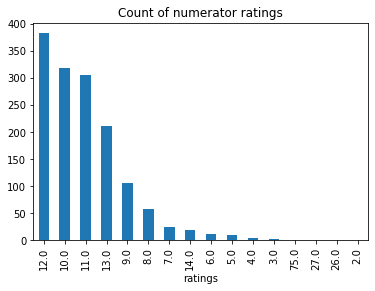

In [66]:
twitter_archive_master["rating_numerator"].value_counts().plot(kind ="bar", title = "Count of numerator ratings",
                                                              xlabel = "ratings")

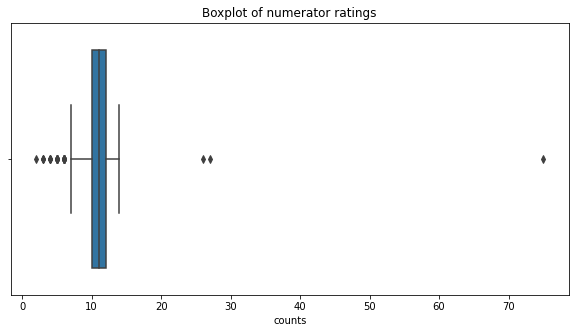

In [67]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(x = twitter_archive_master["rating_numerator"])
ax.set_title("Boxplot of numerator ratings")
ax.set_xlabel("counts")

plt.show()

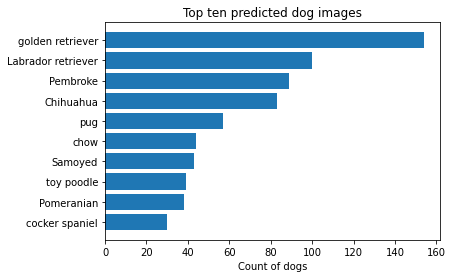

In [68]:
p1 = twitter_archive_master["p1"].value_counts()[0:10]

fig, ax = plt.subplots()
p1.sort_values(inplace = True)
ax.barh(p1.index, p1)
ax.set_title("Top ten predicted dog images")
ax.set_xlabel("Count of dogs")
plt.show()

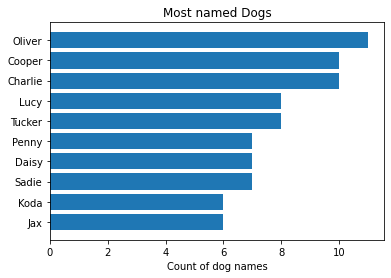

In [69]:
name_count = twitter_archive_master["name"].value_counts()[1:11]

name_count.sort_values(inplace = True)
fig, ax = plt.subplots()
ax.barh(name_count.index, name_count)
ax.set_title("Most named Dogs")
ax.set_xlabel("Count of dog names")
plt.show()